# Homework 13 - Nonlinear regression Daniel Teeuwsen

Use **each** of the three solvers 
- `scipy.optimize.minimize`, 
- `scipy.optimize.least_squares` 
- **and** `scipy.optimize.curve_fit` 

to fit a multi-parameter function to example data. You may choose one of these model functions;

- Fourth polynomial (a well behaved function, but more parameters)
$$
f(x;\vec{a}) = a_4x^4+a_3x^3+a_2x^2+a_1x+a_0
$$
- Gaussian function (the Jacobian is a bit messy)
$$
f(x;\vec{a}) = a_0e^{-((x-a_1)^2)/a_2}
$$
- Cosine function (fit is sensitive to frequency inital guess)
$$
f(x;\vec{a}) = a_0\cos(a_1x+a_2)
$$

- Construct *slightly* noisy data much like the lecutre notes. 

- For each fit, plot
   - the data you are fitting,
   - the true curve,
   - the fit. 

<div class="alert alert-block alert-info">
<b>Tip:</b> Start with no noise in your data, that way you know that if there are any problems, it's not the noise.
</div>

<div class="alert alert-block alert-info">
    <b>Tip:</b> It might be easier to start with <tt>scipy.optimize.curvefit</tt>, because you only need to supply the fitting function. Then move to <tt>scipy.optimize.least_squares</tt>, where you need to supply the residuals and the Jacobian of the residuals.
    
When youhave them working, that can be used as the basis for <tt>scipy.optimize.minimize</tt>.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Increase the number of data points to fit. 
    
For example, if you ahve 20 data points, and only 6 are in the gausian their influence on the parameter space will be minimal. You may use equally spaced data in the $x$ axis if you wish.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that the fitting the cosine function is very sensitive to a good inital guess for the frequency, and the gaussian function is a little sensitive to a good inital guess of the variance and position.
</div>

<div class="alert alert-block alert-info">
    <b>Tip:</b> You may not get <tt>scipy.optimize.minimize</tt> with <tt>Newton-CG</tt> to give you the really good fits you want; that's okay. Try your best to provide the correct Jacobian.
</div>

In [1]:
%matplotlib inline
import numpy             as np
import scipy.optimize
import scipy.stats
import scipy.misc
import matplotlib.pyplot as plt

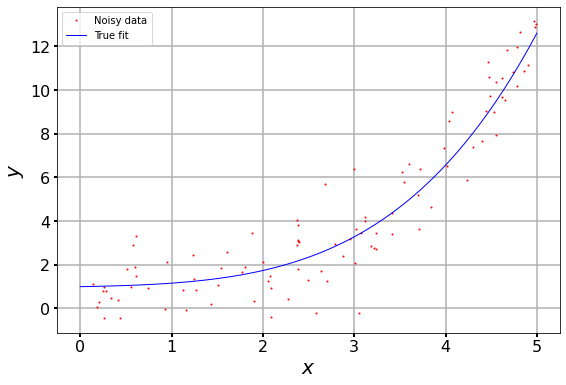

In [2]:
## Initial Set up ##

xmin = 0.
xmax = 5.
n    = 100

a0 = 1.         # Exact model parameters
a1 = 0.07
a2 = 0.05
a3 = 0.03
a4 = 0.01
a_i = np.array([a0,a1,a2,a3,a4])

sigma = 1.1
mu    = 0.0
noise = sigma * np.random.randn((n)) + mu  # variation in data

def f(xdata,a_i):   # 4th degree polynomial takes x values and parameter array
    f = a_i[0] + a_i[1]*xdata + a_i[2]*xdata**2 + a_i[3]*xdata**3 + a_i[4]*xdata**4
    return f

x = np.random.random((n))*(xmax-xmin) + xmin   # generate random x values within interval
y = f(x,a_i) + noise                           # plot the generated values and add 'noise'

xtrue = np.linspace(xmin,xmax,n)               # generate the true line of best fit
ytrue = f(xtrue,a_i)


plt.figure(figsize=(9,6))
plt.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20)
plt.plot(x,y,'r.',markersize=2, label='Noisy data')
plt.plot(xtrue,ytrue,'b', linewidth=1, label='True fit')
plt.legend()
plt.grid(True,linewidth=1.5,axis="both")
plt.show()
plt.close()

scipy.optimize.curve_fit : 
a0             : 0.1682+/-0.7073
a1             : 2.5289+/-2.0131
a2             : -1.8434+/-1.5693
a3             : 0.5577+/-0.4543
a4             : -0.0379+/-0.0438


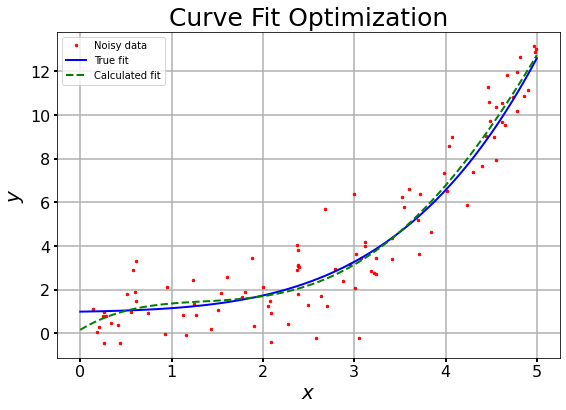

In [7]:
   ##  Curve Fit ##

def model_f(x,*args):
    a0,a1,a2,a3,a4 = args
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

initial_guess = np.array([1.,0.,0.,0.,0.02])  # f(5)=about 13 and 5^4=625 so guess 0.02 x^4 + 1 = 13.5
res = scipy.optimize.curve_fit(model_f,x,y,initial_guess)
par = res[0]
var = np.sqrt(np.diag(res[1]))

print("scipy.optimize.curve_fit : ")
print(f"a0             : {par[0]:3.4f}+/-{var[0]:3.4f}")
print(f"a1             : {par[1]:3.4f}+/-{var[1]:3.4f}")
print(f"a2             : {par[2]:3.4f}+/-{var[2]:3.4f}")
print(f"a3             : {par[3]:3.4f}+/-{var[3]:3.4f}")
print(f"a4             : {par[4]:3.4f}+/-{var[4]:3.4f}")
#print("\n")

yplot  = model_f(xtrue,*(par[0],par[1],par[2],par[3],par[4]))
plt.figure(figsize=(9,6))
plt.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20)
plt.title(r"Curve Fit Optimization", fontsize=25)
plt.plot(x,     y,     'r.',markersize=5, label='Noisy data')
plt.plot(xtrue, ytrue, 'b-',linewidth=2, label='True fit')
plt.plot(xtrue, yplot, 'g--',linewidth=2, label='Calculated fit')
plt.grid(True,linewidth=1.5,axis='both')
plt.legend()
plt.show()
plt.close()

scipy.optimize.least_squares : 
Success                      : True
Message                      : `gtol` termination condition is satisfied.
a0        : 0.1682+/-0.5836
a1        : 2.5289+/-1.6611
a2        : -1.8434+/-1.2949
a3        : 0.5577+/-0.3748
a4        : -0.0379+/-0.0361




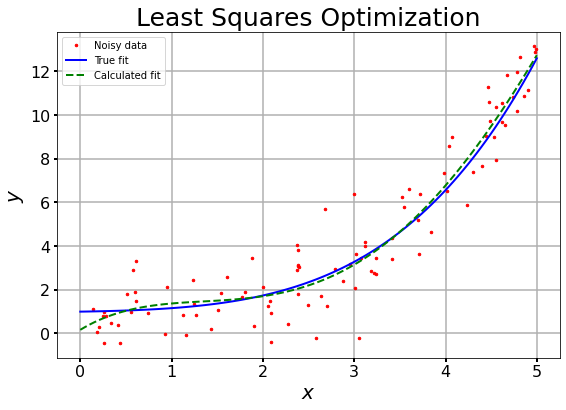

In [6]:
## Least Squares ##

def f_model(a,*args):
    x,y = args
    a0,a1,a2,a3,a4 = a
    residual = a0 + a1*x +a2*x**2 + a3*x**3 + a4*x**4 - y
    return residual
   
def J_model(a,*args):
    x,y = args
    a0,a1,a2,a3,a4 = a
    J0 = np.ones(x.size)
    J1 = x
    J2 = x**2
    J3 = x**3
    J4 = x**4
    return np.array([J0,J1,J2,J3,J4]).T

res = scipy.optimize.least_squares(f_model, initial_guess,method='lm', jac=J_model,args=(x,y))
hessian = res.jac.T@res.jac
covariance = np.abs(np.linalg.inv(hessian))
var = np.sqrt(np.diagonal(covariance))

print("scipy.optimize.least_squares : ")
print(f"Success                      : {res.success}")
print(f"Message                      : {res.message}")
print(f"a0        : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"a1        : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
print(f"a2        : {res.x[2]:3.4f}+/-{var[2]:3.4f}")
print(f"a3        : {res.x[3]:3.4f}+/-{var[3]:3.4f}")
print(f"a4        : {res.x[4]:3.4f}+/-{var[4]:3.4f}")
print("\n")

yplot  = res.x[0] + res.x[1]*xtrue + res.x[2]*xtrue**2 + res.x[3]*xtrue**3 + res.x[4]*xtrue**4

plt.figure(figsize=(9,6))
plt.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20)
plt.title(r"Least Squares Optimization", fontsize=25)
plt.plot(x,     y,     'r.',markersize=5, label='Noisy data')
plt.plot(xtrue, ytrue, 'b-',linewidth=2, label='True fit')
plt.plot(xtrue, yplot, 'g--',linewidth=2, label='Calculated fit')
plt.grid(True,linewidth=1.5,axis='both')
plt.legend()
plt.show()
plt.close()

scipy.optimize.minimize : Nelder-Mead
Message                 : Optimization terminated successfully.
a0        : 1.0430+/-0.5836
a1        : -0.0084+/-1.6611
a2        : -0.0177+/-1.2949
a3        : 0.0729+/-0.3748
a4        : 0.0052+/-0.0361




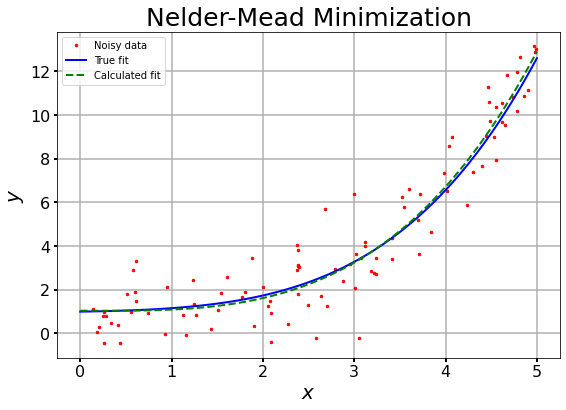

scipy.optimize.minimize : Newton-CG
Message                 : Optimization terminated successfully.
a0        : 0.1682+/-0.5836
a1        : 2.5289+/-1.6611
a2        : -1.8434+/-1.2949
a3        : 0.5577+/-0.3748
a4        : -0.0379+/-0.0361




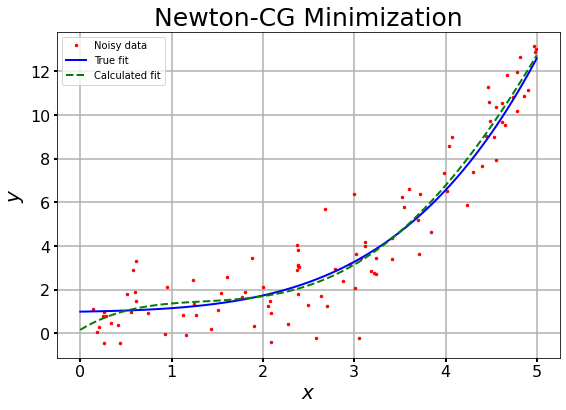

In [12]:
## Minimize ##


def f_model(a,*args):
    x,y = args
    a0,a1,a2,a3,a4 = a
    residual_squared = (a0 + a1*x +a2*x**2 + a3*x**3 + a4*x**4 - y)**2
    return np.sum(residual_squared)
       
def J_model(a,*args):
    x,y = args
    a0,a1,a2,a3,a4 = a
    residual = (a0 + a1*x +a2*x**2 + a3*x**3 + a4*x**4 - y)
    J0 = residual
    J1 = residual*x
    J2 = residual*x**2
    J3 = residual*x**3
    J4 = residual*x**4
    J0 = 2.*np.sum(J0)
    J1 = 2.*np.sum(J1)
    J2 = 2.*np.sum(J2)
    J3 = 2.*np.sum(J3)
    J4 = 2.*np.sum(J4)
    return np.array([J0,J1,J2,J3,J4])
    
def J_model_2(a,*args):
    x,y = args
    a0,a1,a2,a3,a4 = a
    J0 = np.ones(x.size)
    J1 = x
    J2 = x**2
    J3 = x**3
    J4 = x**4
    return np.array([J0,J1,J2,J3,J4]).T

res = scipy.optimize.minimize(f_model,initial_guess,args=(x,y),method="Nelder-Mead")   #Method 1 without jacobain
jac = J_model_2(res.x,*(x,y))
hessian = jac.T@jac
covariance = np.abs(np.linalg.inv(hessian))
var = np.sqrt(np.diagonal(covariance))

yplot  = res.x[0] + res.x[1]*xtrue + res.x[2]*xtrue**2 + res.x[3]*xtrue**3 + res.x[4]*xtrue**4

print("scipy.optimize.minimize : Nelder-Mead")
print(f"Message                 : {res.message}")
print(f"a0        : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"a1        : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
print(f"a2        : {res.x[2]:3.4f}+/-{var[2]:3.4f}")
print(f"a3        : {res.x[3]:3.4f}+/-{var[3]:3.4f}")
print(f"a4        : {res.x[4]:3.4f}+/-{var[4]:3.4f}")
print("\n")

plt.figure(figsize=(9,6))
plt.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20)
plt.title(r"Nelder-Mead Minimization", fontsize=25)
plt.plot(x,     y,     'r.',markersize=5, label='Noisy data')
plt.plot(xtrue, ytrue, 'b-',linewidth=2, label='True fit')
plt.plot(xtrue, yplot, 'g--',linewidth=2, label='Calculated fit')
plt.grid(True,linewidth=1.5,axis='both')
plt.legend()
plt.show()
plt.close()

res = scipy.optimize.minimize(f_model,initial_guess,args=(x,y),jac=J_model,method="Newton-CG")  #Method 2 with jacobian
jac = J_model_2(res.x,*(x,y))
hessian = jac.T@jac
covariance = np.abs(np.linalg.inv(hessian))
var = np.sqrt(np.diagonal(covariance))

yplot  = res.x[0] + res.x[1]*xtrue + res.x[2]*xtrue**2 + res.x[3]*xtrue**3 + res.x[4]*xtrue**4

print("scipy.optimize.minimize : Newton-CG")
print(f"Message                 : {res.message}")
print(f"a0        : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"a1        : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
print(f"a2        : {res.x[2]:3.4f}+/-{var[2]:3.4f}")
print(f"a3        : {res.x[3]:3.4f}+/-{var[3]:3.4f}")
print(f"a4        : {res.x[4]:3.4f}+/-{var[4]:3.4f}")
print("\n")

plt.figure(figsize=(9,6))
plt.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20)
plt.title(r"Newton-CG Minimization", fontsize=25)
plt.plot(x,     y,     'r.',markersize=5, label='Noisy data')
plt.plot(xtrue, ytrue, 'b-',linewidth=2, label='True fit')
plt.plot(xtrue, yplot, 'g--',linewidth=2, label='Calculated fit')
plt.grid(True,linewidth=1.5,axis='both')
plt.legend()
plt.show()
plt.close()